# Problem 1: Clustering

# 1.1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bank_df=pd.read_csv('C:/Users/nicky/Downloads/bank_marketing_part1_Data.csv')

In [3]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
# Checking for columns and rows
bank_df.shape

(210, 7)

In [5]:
#Checking for info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
# Checking for null values
bank_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [7]:
# Checking for duplicates
bank_df.duplicated().sum()

0

In [8]:
np.round(bank_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.85,2.91,10.59,12.27,14.36,17.30,21.18
advance_payments,210.0,14.56,1.31,12.41,13.45,14.32,15.72,17.25
probability_of_full_payment,210.0,0.87,0.02,0.81,0.86,0.87,0.89,0.92
current_balance,210.0,5.63,0.44,4.90,5.26,5.52,5.98,6.68
credit_limit,210.0,3.26,0.38,2.63,2.94,3.24,3.56,4.03
min_payment_amt,210.0,3.70,1.50,0.77,2.56,3.60,4.77,8.46
max_spent_in_single_shopping,210.0,5.41,0.49,4.52,5.04,5.22,5.88,6.55


Univariate Analysis

columns : spending
skew :  0.4
columns : advance_payments
skew :  0.39
columns : probability_of_full_payment
skew :  -0.54
columns : current_balance
skew :  0.53
columns : credit_limit
skew :  0.13
columns : min_payment_amt
skew :  0.4
columns : max_spent_in_single_shopping
skew :  0.56


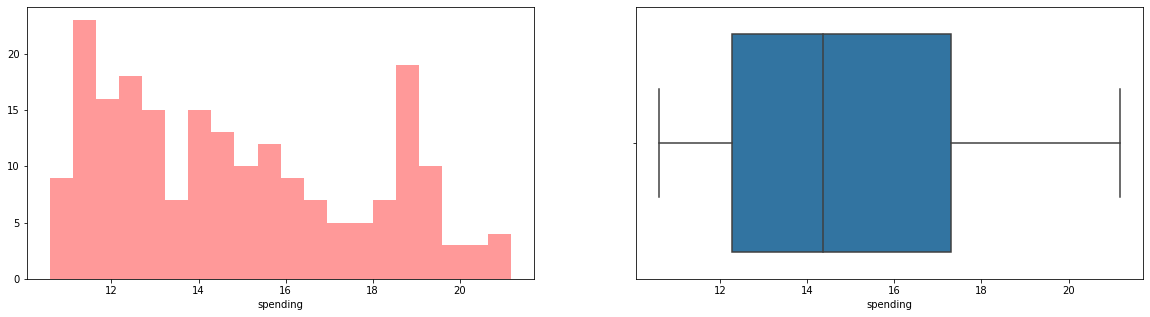

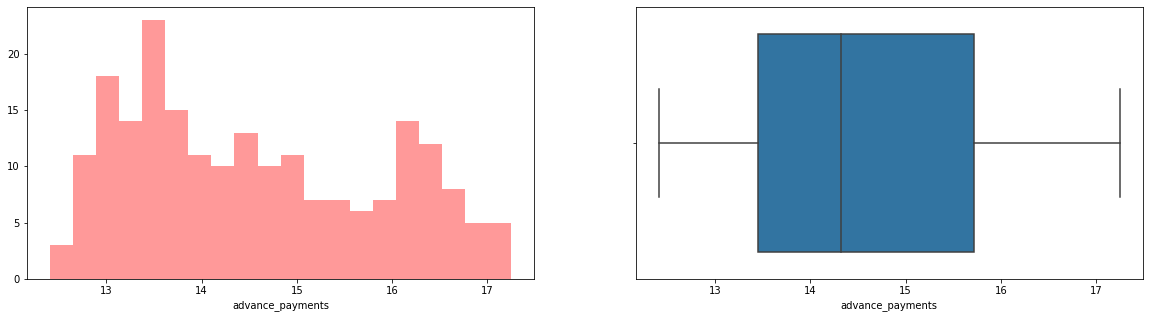

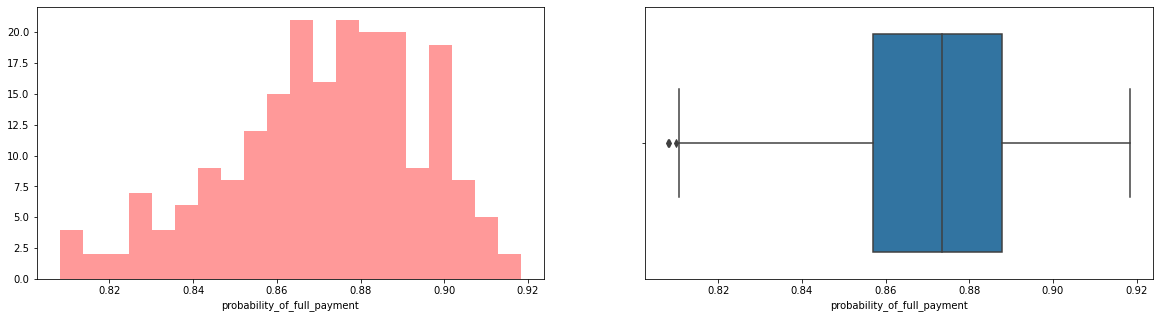

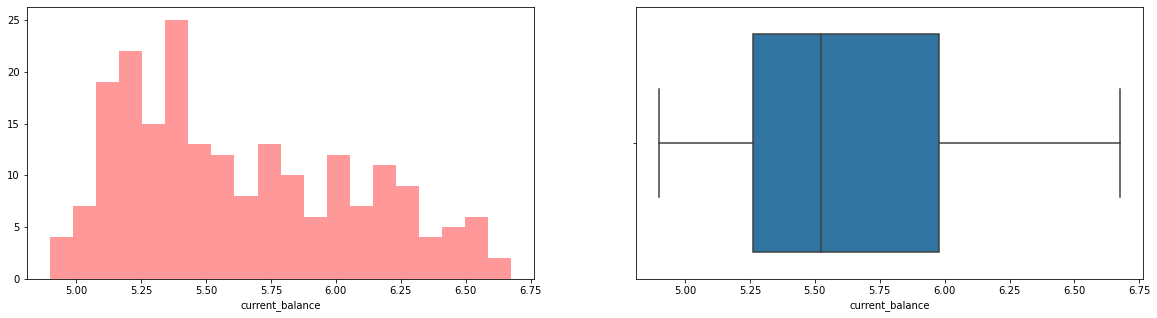

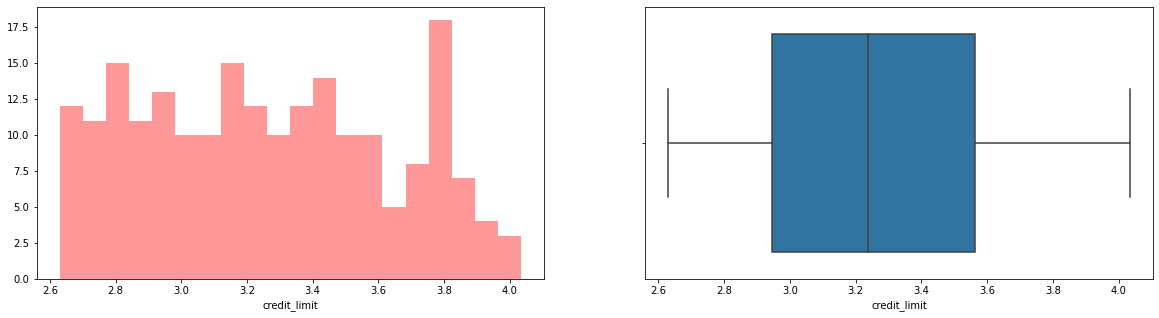

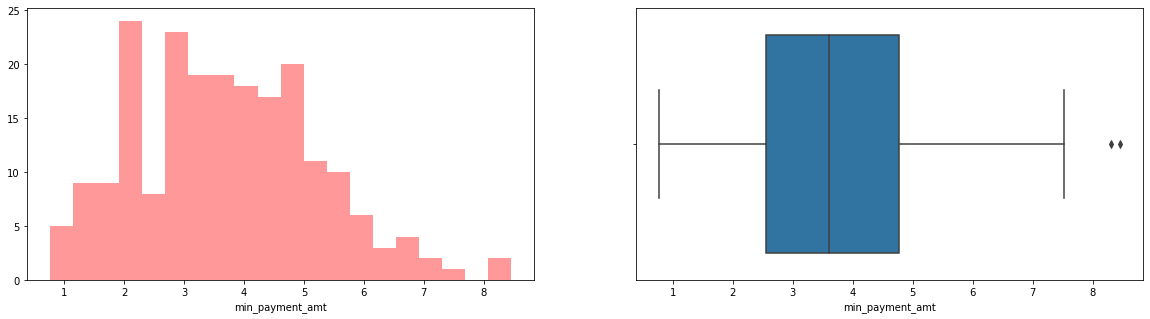

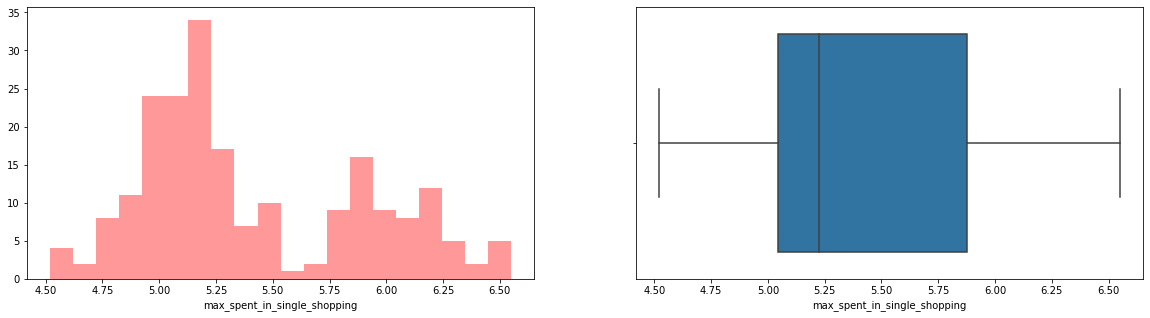

In [9]:
for columns in bank_df.columns:
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
    sns.distplot(bank_df[columns],bins=20,kde=False,color='red',ax=axes[0])
    sns.boxplot(x=bank_df[columns],data=bank_df,ax=axes[1])
    print('columns :',columns)
    print("skew : " , np.round(bank_df[columns].skew(),2))
   
    
    

Bivariate Analysis

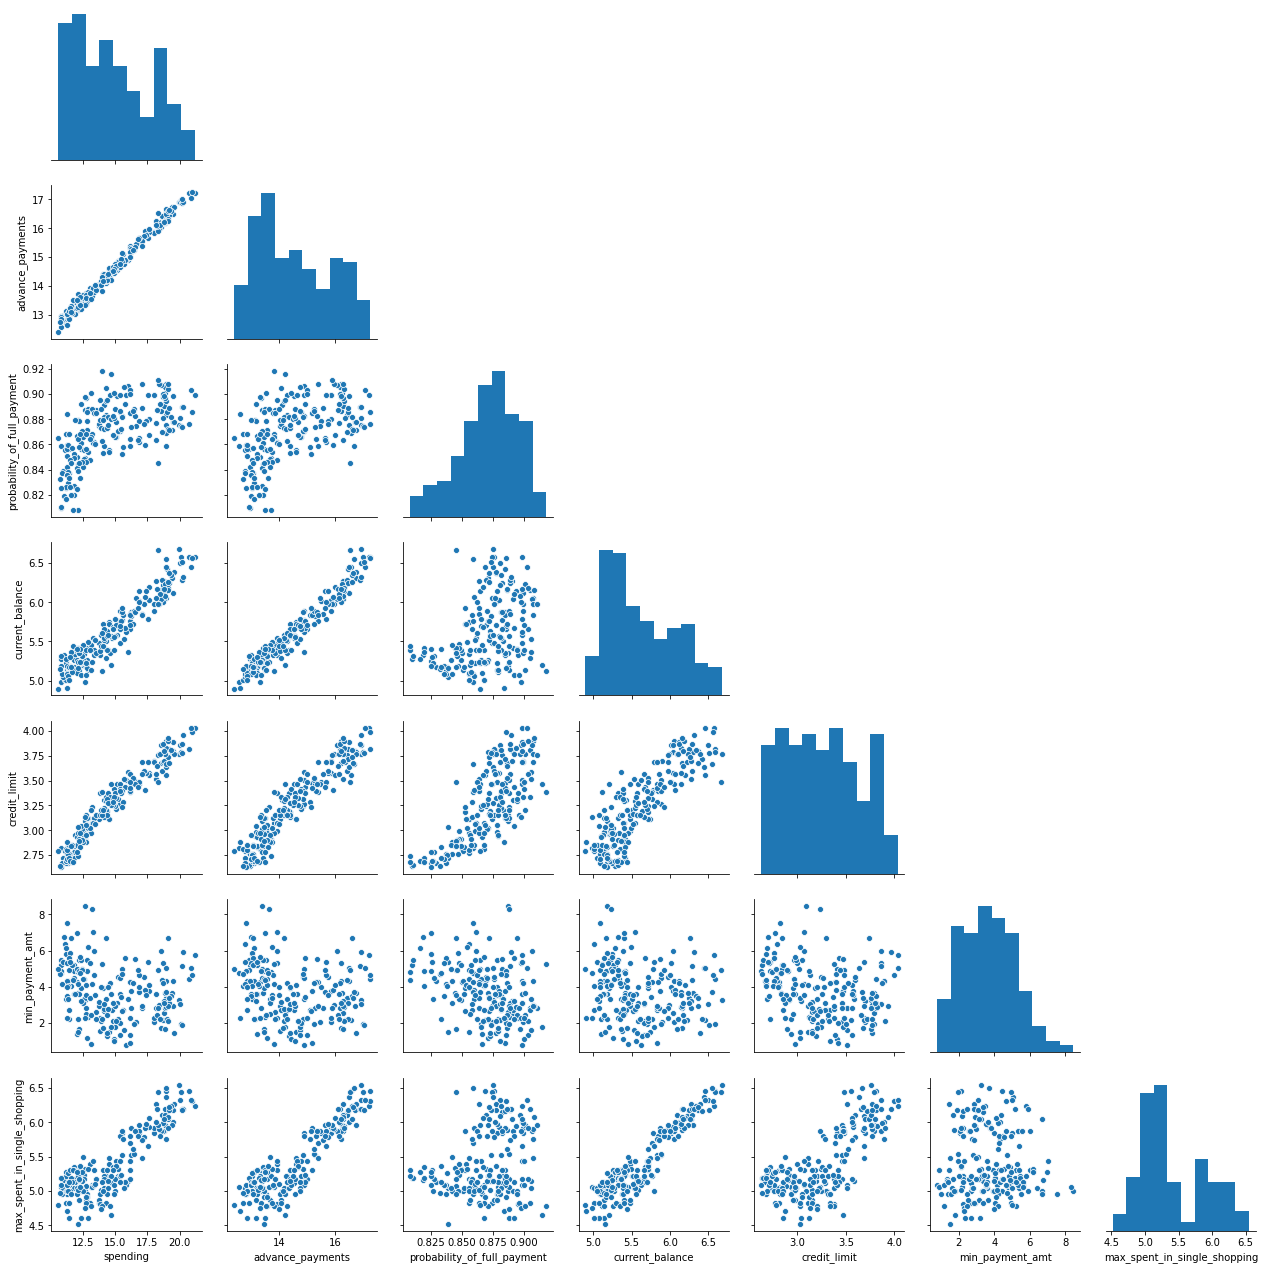

In [10]:
sns.pairplot(bank_df,corner=True)

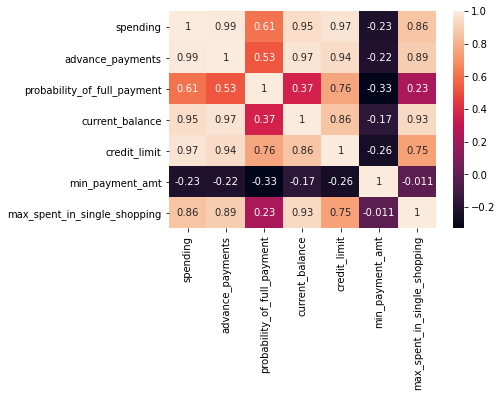

In [11]:
sns.heatmap(bank_df.corr(),annot=True,fmt='.2g');

# 1.3

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
x=StandardScaler()

In [14]:
scaled_df=x.fit_transform(bank_df)


In [15]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [16]:
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster

In [17]:
wardlink=linkage(scaled_df,method='ward')

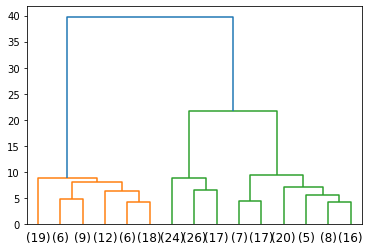

In [18]:
dend=dendrogram(wardlink,truncate_mode='lastp',p=15)

In [19]:
clusters=fcluster(wardlink,25,criterion='distance')
clusters


array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [20]:
# Making a copy of df
cluster_df=bank_df.copy()

In [21]:
# Attaching clusters as a column to copied df
cluster_df['clusters']=clusters
cluster_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


# 1.4

In [22]:
from sklearn.cluster import KMeans

In [23]:
k_means=KMeans(n_clusters=1)
k_means.fit(scaled_df)
k_means.inertia_

1469.9999999999998

In [24]:
k_means=KMeans(n_clusters=2)
k_means.fit(scaled_df)
k_means.inertia_

659.171754487041

In [25]:
k_means=KMeans(n_clusters=3)
k_means.fit(scaled_df)
k_means.inertia_

430.6589731513006

In [26]:
k_means=KMeans(n_clusters=4)
k_means.fit(scaled_df)
k_means.inertia_

371.29354819439664

In [27]:
k_means=KMeans(n_clusters=5)
k_means.fit(scaled_df)
k_means.inertia_

327.9491576965087

wss plot

In [28]:
wss=[]
for i in range(1,11):
    k_means=KMeans(n_clusters=i)
    k_means.fit(scaled_df)
    wss.append(k_means.inertia_)

In [29]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.65314399951626,
 326.7106563112603,
 288.95334686682884,
 262.49887755052856,
 243.13557595580835,
 222.76854792949948,
 204.56419747842511]

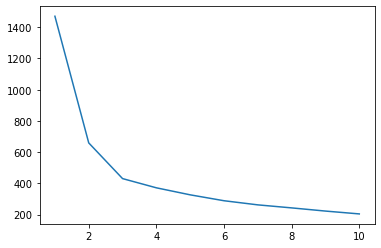

In [30]:
plt.plot(range(1,11),wss)

In [31]:
k_means=KMeans(n_clusters=2)
k_means.fit(scaled_df)
labels=k_means.labels_

In [32]:
kmeans_df=bank_df.copy()
kmeans_df['kmeans cluster']=labels
kmeans_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,kmeans cluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


Silhoutte score

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
np.round(silhouette_score(scaled_df,labels),2)

0.47

# 1.5

In [35]:
# Getting cluster 1 from hierarchical clustering
cluster1=cluster_df[cluster_df['clusters']==1]
cluster1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1
10,18.55,16.22,0.8865,6.153,3.674,1.738,5.894,1


In [36]:
np.round(cluster1.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
spending,70.0,18.37,1.38,15.38,17.33,18.72,19.14,21.18
advance_payments,70.0,16.15,0.60,14.86,15.74,16.21,16.56,17.25
probability_of_full_payment,70.0,0.88,0.01,0.85,0.87,0.88,0.90,0.91
current_balance,70.0,6.16,0.25,5.71,5.98,6.15,6.31,6.68
credit_limit,70.0,3.68,0.17,3.27,3.55,3.69,3.80,4.03
min_payment_amt,70.0,3.64,1.21,1.47,2.85,3.63,4.46,6.68
max_spent_in_single_shopping,70.0,6.02,0.25,5.44,5.88,5.98,6.19,6.55
clusters,70.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00


In [37]:
# Getting cluster 2 from hierarchical clustering
cluster2=cluster_df[cluster_df['clusters']==2]
cluster2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,2
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,2


In [38]:
np.round(cluster2.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
spending,140.0,13.09,1.55,10.59,11.82,12.77,14.35,16.63
advance_payments,140.0,13.77,0.70,12.41,13.21,13.66,14.30,15.46
probability_of_full_payment,140.0,0.86,0.02,0.81,0.85,0.87,0.88,0.92
current_balance,140.0,5.36,0.23,4.90,5.18,5.35,5.52,6.05
credit_limit,140.0,3.05,0.25,2.63,2.84,3.04,3.23,3.58
min_payment_amt,140.0,3.73,1.63,0.77,2.46,3.60,4.88,8.46
max_spent_in_single_shopping,140.0,5.10,0.23,4.52,5.00,5.09,5.22,5.88
clusters,140.0,2.00,0.00,2.00,2.00,2.00,2.00,2.00


In [39]:
# Getting cluster 1 from K means clustering
kmeans1=kmeans_df[kmeans_df['kmeans cluster']==0]
kmeans1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,kmeans cluster
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,0
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,0
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,0


In [40]:
np.round(kmeans1.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
spending,133.0,12.93,1.43,10.59,11.75,12.72,14.11,15.99
advance_payments,133.0,13.69,0.64,12.41,13.19,13.57,14.21,14.94
probability_of_full_payment,133.0,0.86,0.02,0.81,0.85,0.87,0.88,0.92
current_balance,133.0,5.34,0.21,4.90,5.18,5.33,5.48,5.79
credit_limit,133.0,3.03,0.24,2.63,2.82,3.03,3.20,3.58
min_payment_amt,133.0,3.83,1.61,0.86,2.59,3.64,4.92,8.46
max_spent_in_single_shopping,133.0,5.08,0.20,4.52,4.96,5.09,5.22,5.49
kmeans cluster,133.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [41]:
# Getting cluster 2 from k means clustering
kmeans2=kmeans_df[kmeans_df['kmeans cluster']==1]
kmeans2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,kmeans cluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1
10,18.55,16.22,0.8865,6.153,3.674,1.738,5.894,1


In [42]:
np.round(kmeans2.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
spending,77.0,18.16,1.48,15.38,16.84,18.55,19.11,21.18
advance_payments,77.0,16.05,0.64,14.86,15.55,16.18,16.50,17.25
probability_of_full_payment,77.0,0.88,0.02,0.85,0.87,0.88,0.90,0.91
current_balance,77.0,6.13,0.26,5.62,5.92,6.11,6.28,6.68
credit_limit,77.0,3.66,0.19,3.23,3.50,3.68,3.80,4.03
min_payment_amt,77.0,3.48,1.28,0.77,2.55,3.37,4.39,6.68
max_spent_in_single_shopping,77.0,5.97,0.29,5.09,5.84,5.96,6.18,6.55
kmeans cluster,77.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00


# Problem 2: CART-RF-ANN


In [43]:
insurance_df=pd.read_csv('C:/Users/nicky/Downloads/insurance_part2_data.csv')

In [44]:
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [45]:
insurance_df.shape

(3000, 10)

In [46]:
#Checking info of Dataframe
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [47]:
#Checking for null values
null=insurance_df.isnull().sum()


In [48]:
#Describing Dataframe
insurance_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Checking for duplicates
insurance_df.duplicated().sum()


139

In [50]:
# Dropping duplicate rows
insurance_df.drop_duplicates(inplace=True)

In [51]:
# Checking for info after dropping duplicate rows
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   object 
 2   Type          2861 non-null   object 
 3   Claimed       2861 non-null   object 
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   object 
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   object 
 9   Destination   2861 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 245.9+ KB


Univariate analysis

skew: 1.1
skew: 13.79


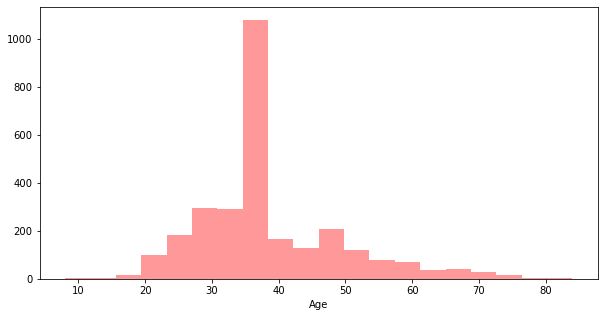

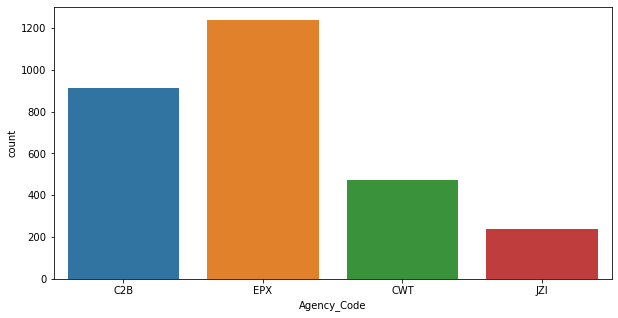

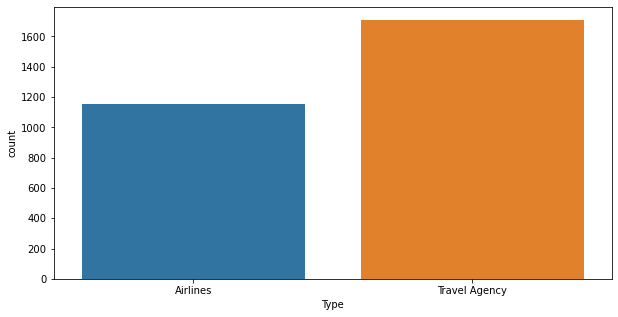

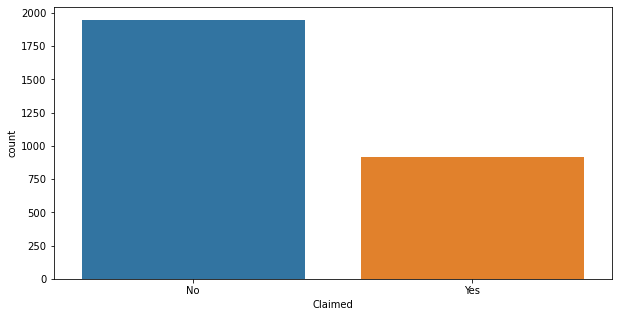

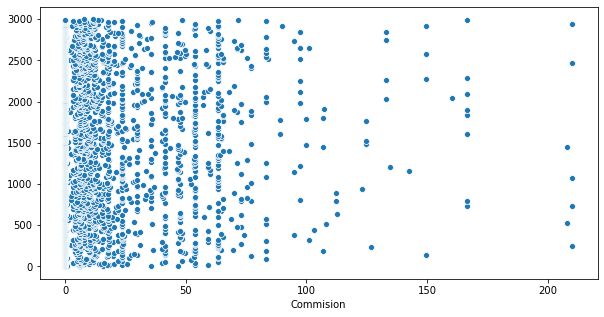

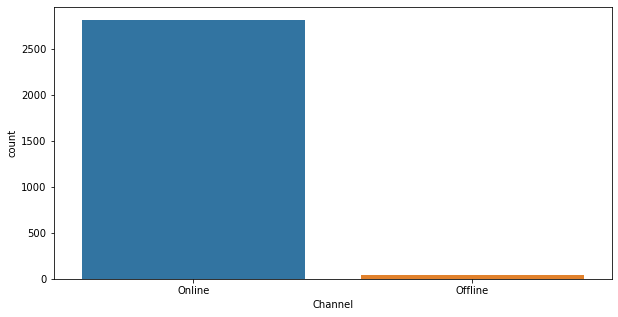

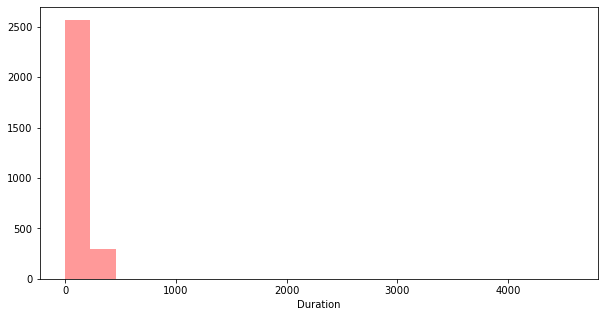

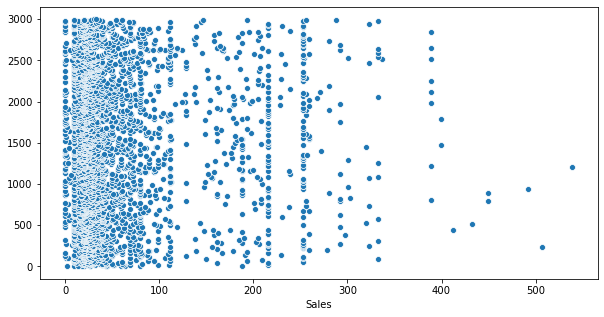

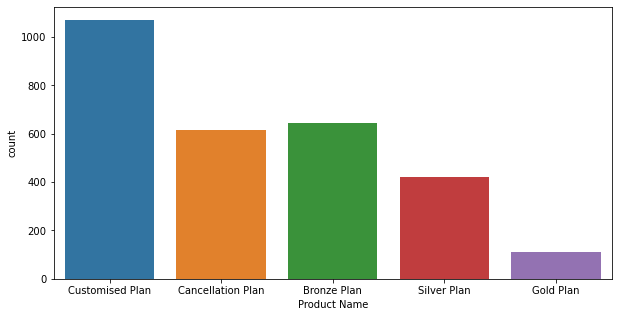

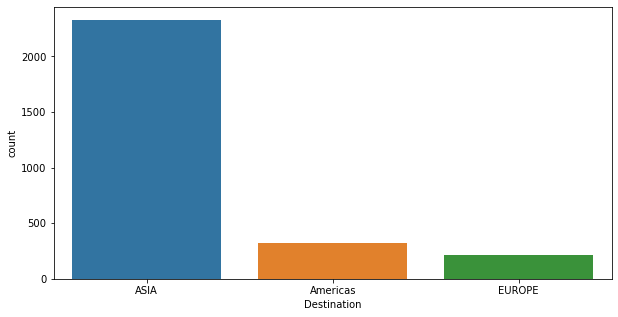

In [52]:
for columns in insurance_df.columns:
    fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
    
    if insurance_df[columns].dtype=='int64':
        sns.distplot(insurance_df[columns],bins=20,kde=False,color='red')
        print('skew:',np.round(insurance_df[columns].skew(),2))
        
    elif insurance_df[columns].dtype=='object':
        sns.countplot(x=insurance_df[columns],data=insurance_df)
    else:
        sns.scatterplot(x=insurance_df[columns],y=insurance_df.index,data=insurance_df)

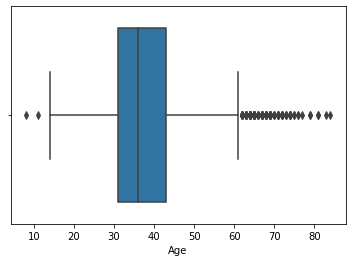

In [53]:
# Checking for outliers
sns.boxplot(insurance_df['Age'])


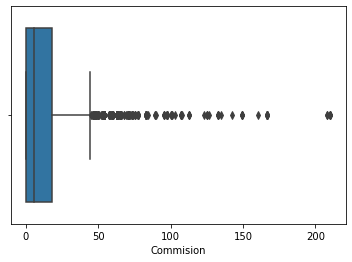

In [54]:
sns.boxplot(insurance_df['Commision'])

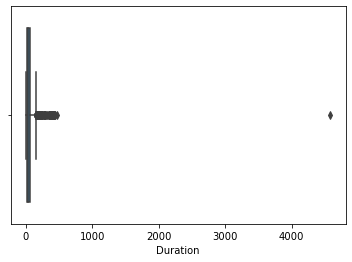

In [55]:
sns.boxplot(insurance_df['Duration'])

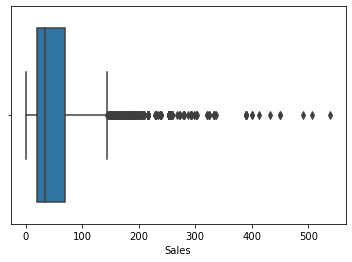

In [56]:
sns.boxplot(insurance_df['Sales'])

Bivariate analysis

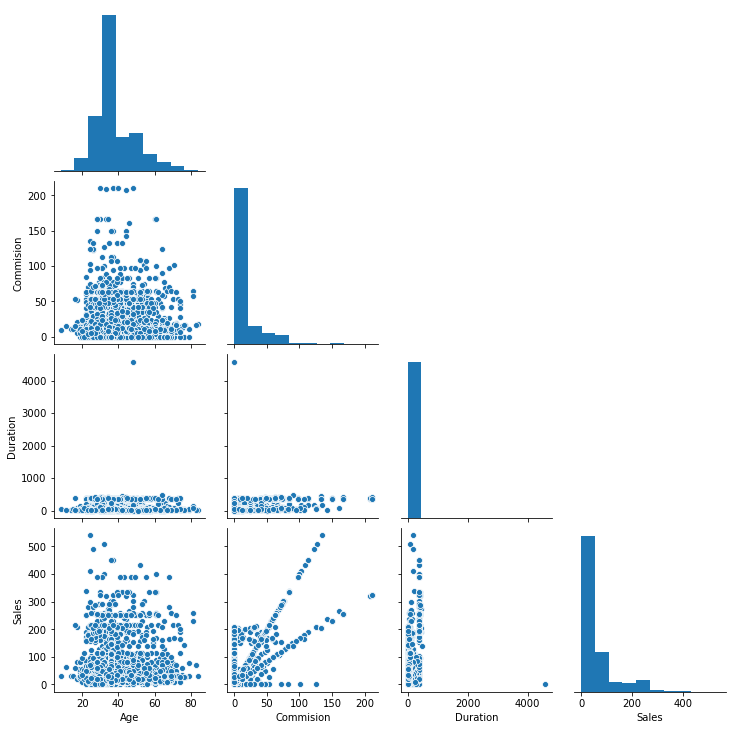

In [57]:
sns.pairplot(insurance_df,corner=True);

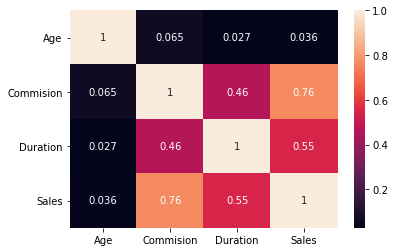

In [58]:
sns.heatmap(insurance_df.corr(),annot=True,fmt='.2g');

# 2.2

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
# Converting object data type into integer
for features in insurance_df.columns:
    if insurance_df[features].dtype=='object':
        insurance_df[features]=pd.Categorical(insurance_df[features]).codes
       

In [61]:
# Checking Dataframe info after conversion
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [62]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 208.5 KB


In [63]:
# Separating dependent and independent variables
x=insurance_df.drop('Claimed',axis=1)
y=insurance_df.pop('Claimed')

In [64]:
#  performimg train and test splitting
from sklearn.model_selection import train_test_split

x_train,x_test,train_labels,test_labels=train_test_split(x,y,test_size=.30,random_state=1)

CART Model

In [143]:
dt_model=DecisionTreeClassifier(criterion='gini')

In [144]:
dt_model.fit(x_train,train_labels)

DecisionTreeClassifier()

In [145]:
from sklearn import tree

In [146]:
train_char_label=['No','Yes']
insurance_tree_file=open('C:\\Users\\nicky\\insurance_tree.dot','w')

In [147]:
dot_data=tree.export_graphviz(dt_model,
                               out_file=insurance_tree_file, 
                               feature_names=list(x_train),
                              class_names=list(train_char_label))

In [148]:
insurance_tree_file.close()

In [149]:

from sklearn.model_selection import GridSearchCV

In [150]:
param_grid={'max_depth':[8,9,10],
           'min_samples_leaf':[20,25,30],
           'min_samples_split':[40,50,60],}

In [151]:
dt_model=DecisionTreeClassifier()

In [152]:
grid_search=GridSearchCV(estimator=dt_model ,param_grid=param_grid, cv=3)

In [153]:
grid_search.fit(x_train,train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 9, 10],
                         'min_samples_leaf': [20, 25, 30],
                         'min_samples_split': [40, 50, 60]})

In [154]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 50}

In [155]:
best_grid=grid_search.best_estimator_

In [156]:
# predicting on train and test set
ytrain_predict=best_grid.predict(x_train)
ytest_predict=best_grid.predict(x_test)

Random forest Model

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rfcl=RandomForestClassifier()
param_grid={'max_depth':[10,11],
           'max_features':[4,5],
           'min_samples_leaf':[20,25,30],
           'min_samples_split':[50,60,70],
           'n_estimators':[101,201]}

In [93]:
gridsearch=GridSearchCV(estimator=rfcl, param_grid=param_grid, cv=5)

In [94]:
gridsearch.fit(x_train,train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 11], 'max_features': [4, 5],
                         'min_samples_leaf': [20, 25, 30],
                         'min_samples_split': [50, 60, 70],
                         'n_estimators': [101, 201]})

In [95]:
gridsearch.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 101}

In [96]:
best_grid=gridsearch.best_estimator_

In [97]:
ytrain_predict=best_grid.predict(x_train)
ytest_predict=best_grid.predict(x_test)

Artificial neural network model


In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [109]:
sc=StandardScaler()

In [110]:
x_trains=sc.fit_transform(x_train)

In [111]:
x_tests=sc.transform(x_test)

In [112]:
param_grid={'hidden_layer_sizes':[10,100],
           'activation':['logistic','relu'],
           'solver':['sgd','adam'],
           'tol':[0.1,0.01],
           'max_iter':[10000]}

In [113]:
mlp=MLPClassifier()

In [114]:
gridsearch=GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5)

In [115]:
gridsearch.fit(x_trains,train_labels)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [10, 100], 'max_iter': [10000],
                         'solver': ['sgd', 'adam'], 'tol': [0.1, 0.01]})

In [116]:
gridsearch.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 100,
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [117]:
best_grid=gridsearch.best_estimator_

In [118]:
ytrain_predict=best_grid.predict(x_trains)
ytest_predict=best_grid.predict(x_tests)

# 2.3

In [80]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
 

CART

In [81]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1359
           1       0.70      0.59      0.64       643

    accuracy                           0.79      2002
   macro avg       0.76      0.74      0.75      2002
weighted avg       0.78      0.79      0.78      2002



In [136]:
print(confusion_matrix(train_labels,ytrain_predict))

[[1183  176]
 [ 302  341]]


In [83]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       588
           1       0.64      0.54      0.58       271

    accuracy                           0.76       859
   macro avg       0.72      0.70      0.71       859
weighted avg       0.75      0.76      0.75       859



In [84]:
print(confusion_matrix(test_labels,ytest_predict))

[[506  82]
 [126 145]]


In [157]:
#Getting predicteed class and probability
ytrain_predict
ytrain_predictscore=best_grid.predict_proba(x_train)
ytest_predict
ytest_predictscore=best_grid.predict_proba(x_test)

AUC and ROC curve of train data

In [158]:
# keeping probability of positive outcome
probs=ytrain_predictscore[:,1]
probs

array([0.22916667, 0.36666667, 0.25714286, ..., 0.05084746, 0.12903226,
       0.4375    ])

In [159]:
#Auc score of train set
cart_train_auc=roc_auc_score(train_labels,probs)
cart_train_auc

0.8465863770932107

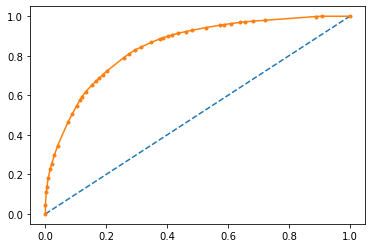

In [88]:
#ROC curve
cart_train_fpr,cart_train_tpr,thresholds=roc_curve(train_labels,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(cart_train_fpr,cart_train_tpr,marker='.')
plt.show()


Auc score and ROC curve of test data

In [89]:
#Auc score of test set 
probs=ytest_predictscore[:,1]
cart_test_auc = roc_auc_score(test_labels, probs)
cart_test_auc

0.7697304013856464

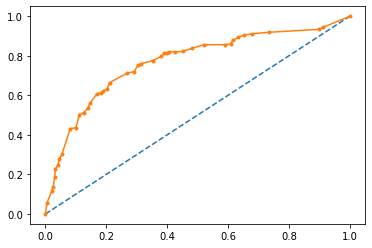

In [90]:
#ROC curve
cart_test_fpr,cart_test_tpr,thresholds=roc_curve(test_labels,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(cart_test_fpr,cart_test_tpr,marker='.')
plt.show()

RANDOM FOREST 

In [98]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1359
           1       0.73      0.57      0.64       643

    accuracy                           0.79      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.79      0.79      2002



In [99]:
print(confusion_matrix(train_labels,ytrain_predict))

[[1220  139]
 [ 274  369]]


In [100]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       588
           1       0.70      0.55      0.62       271

    accuracy                           0.78       859
   macro avg       0.76      0.72      0.73       859
weighted avg       0.78      0.78      0.78       859



In [101]:
print(confusion_matrix(test_labels,ytest_predict))

[[525  63]
 [122 149]]


In [102]:
#Getting predicteed class and probability
ytrain_predict
ytrain_predictscore=best_grid.predict_proba(x_train)
ytest_predict
ytest_predictscore=best_grid.predict_proba(x_test)

AUC and ROC curve of train data

In [103]:
# keeping probability of positive outcome
probs=ytrain_predictscore[:,1]
probs

array([0.25041807, 0.28186873, 0.21875485, ..., 0.05053115, 0.25469921,
       0.31053891])

In [104]:
#Auc score of train set
rfcl_train_auc = roc_auc_score(train_labels, probs)
rfcl_train_auc

0.8443210804761072

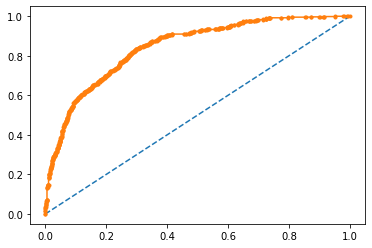

In [105]:
rfcl_train_fpr,rfcl_train_tpr,thresholds=roc_curve(train_labels,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(rfcl_train_fpr,rfcl_train_tpr,marker='.')
plt.show()


Auc score and ROC curve of test data

In [106]:
#Auc score of test set 
probs=ytest_predictscore[:,1]
rfcl_test_auc = roc_auc_score(test_labels, probs)
rfcl_test_auc

0.815990787458895

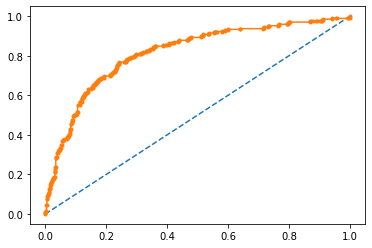

In [107]:
#ROC curve
rfcl_test_fpr,rfcl_test_tpr,thresholds=roc_curve(test_labels,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(rfcl_test_fpr,rfcl_test_tpr,marker='.')
plt.show()

ARTIFICIAL NEURAL NETWORK

In [119]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1359
           1       0.66      0.53      0.59       643

    accuracy                           0.76      2002
   macro avg       0.73      0.70      0.71      2002
weighted avg       0.75      0.76      0.75      2002



In [120]:
print(confusion_matrix(train_labels,ytrain_predict))

[[1183  176]
 [ 302  341]]


In [121]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       588
           1       0.69      0.52      0.59       271

    accuracy                           0.77       859
   macro avg       0.74      0.71      0.72       859
weighted avg       0.77      0.77      0.76       859



In [122]:
print(confusion_matrix(test_labels,ytest_predict))

[[523  65]
 [129 142]]


In [123]:
#Getting predicteed class and probability
ytrain_predict
ytrain_predictscore=best_grid.predict_proba(x_trains)
ytest_predict
ytest_predictscore=best_grid.predict_proba(x_tests)

AUC and ROC curve of train data

In [124]:
# keeping probability of positive outcome
probs=ytrain_predictscore[:,1]
probs

array([0.33955407, 0.16015514, 0.31799088, ..., 0.11408883, 0.21285712,
       0.29802921])

In [126]:
#Auc score of train set
ann_train_auc = roc_auc_score(train_labels, probs)
ann_train_auc

0.790873469537225

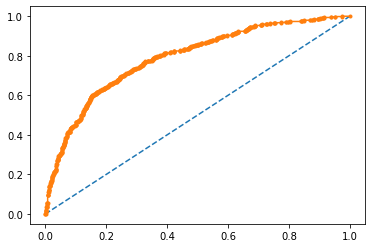

In [127]:
#ROC curve
ann_train_fpr,ann_train_tpr,thresholds=roc_curve(train_labels,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(ann_train_fpr,ann_train_tpr,marker='.')
plt.show()


Auc score and ROC curve of test data

In [128]:
#Auc score of test set 
probs=ytest_predictscore[:,1]
ann_test_auc = roc_auc_score(test_labels, probs)
ann_test_auc

0.799501719506991

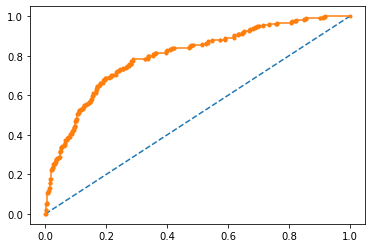

In [129]:
#ROC curve
ann_test_fpr,ann_test_tpr,thresholds=roc_curve(test_labels,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(ann_test_fpr,ann_test_tpr,marker='.')
plt.show()

# 2.4

Comparision ROC curve for all 3 models on train set

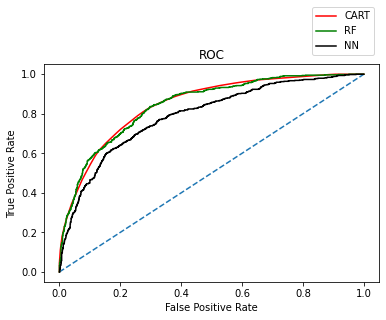

In [131]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rfcl_train_fpr,rfcl_train_tpr,color='green',label="RF")
plt.plot(ann_train_fpr,ann_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Comparision ROC curve for all 3 models

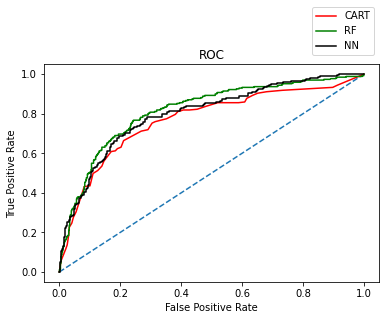

In [132]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rfcl_test_fpr,rfcl_test_tpr,color='green',label="RF")
plt.plot(ann_test_fpr,ann_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')